<a href="https://colab.research.google.com/github/harshithkumardhupam/data-science-project/blob/main/EEG_SleepDetection_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yasa mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.7/127.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.6/419.6 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.6/423.6 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import balanced_accuracy_score, cohen_kappa_score, confusion_matrix
import matplotlib.pyplot as plt
import json
import yasa
import os
import numpy as np

In [ ]:
eeg = np.load('/content/dreem_data/sample/sample/f7_O2.npy')
print('EEG duration', eeg.shape[0] / 250)
accelerometer_x = np.load('/content/dreem_data/sample/sample/accelerometer_x.npy')
print('Accelerometer duration', accelerometer_x.shape[0] / 50)

EEG duration 25845.94
Accelerometer duration 25845.94


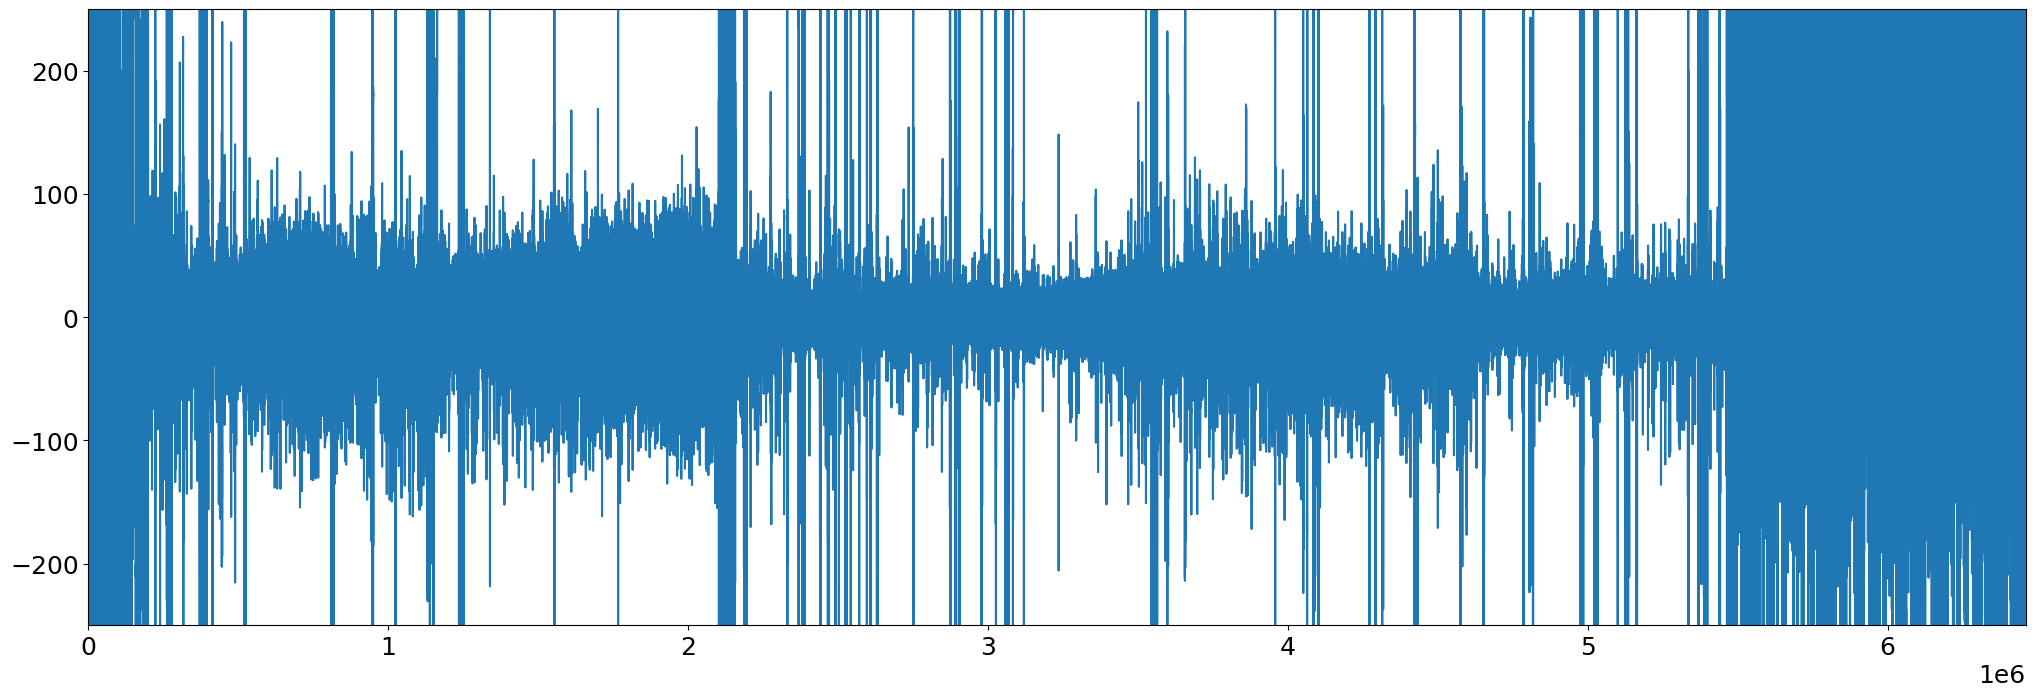

/usr/local/lib/python3.11/dist-packages/yasa/plotting.py:89: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  freq_str = pd.tseries.frequencies.to_offset(pd.Timedelta(1 / sf_hypno, "S")).freqstr


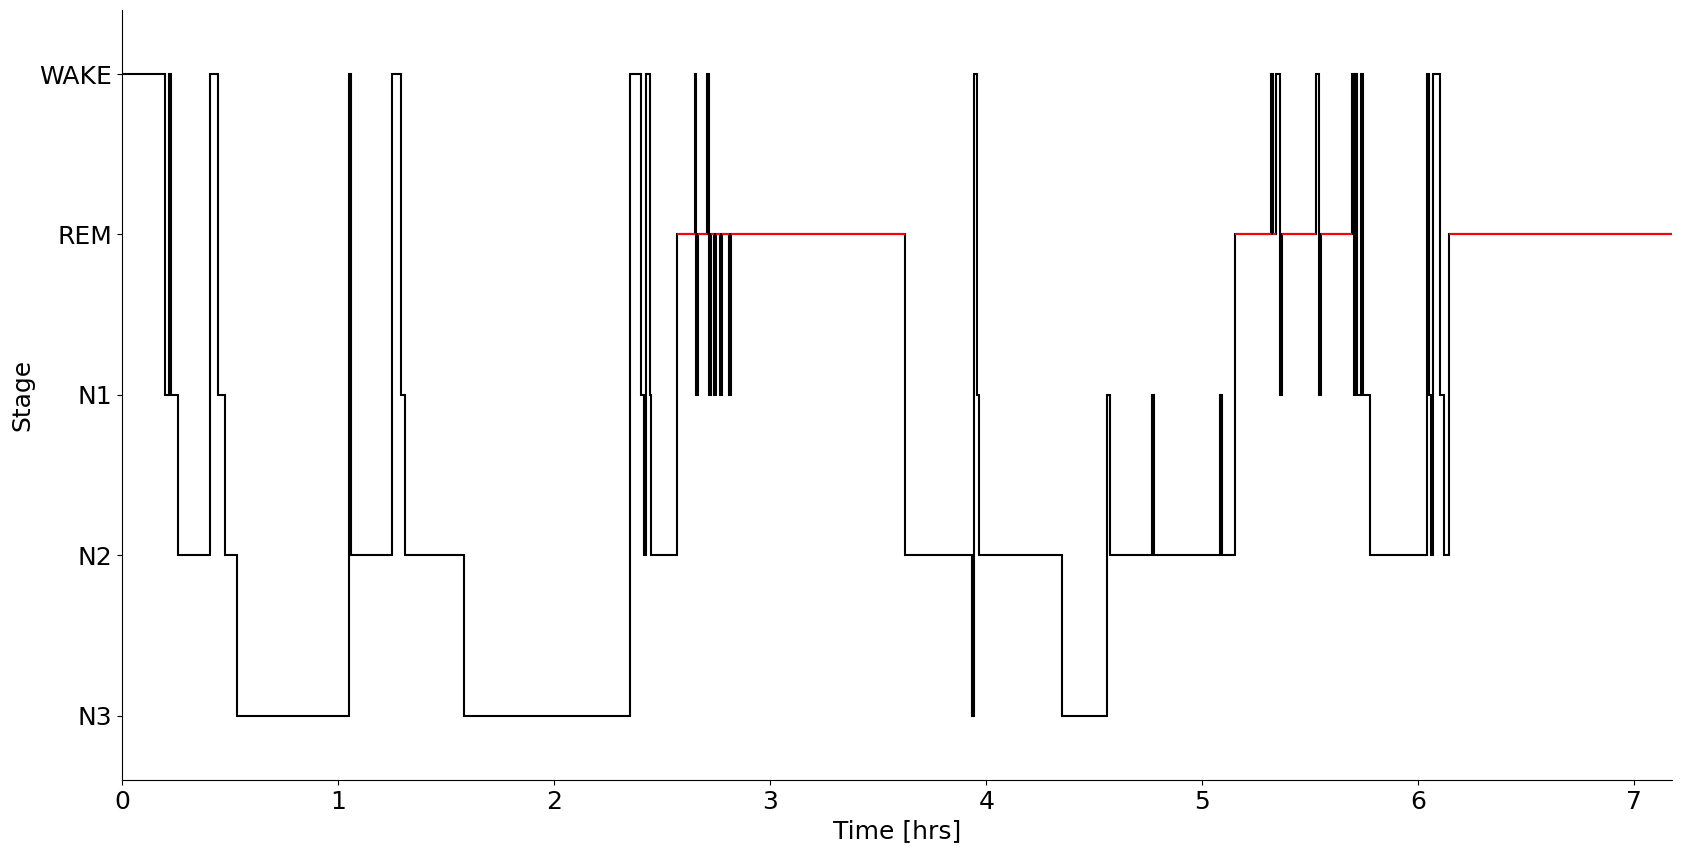

In [ ]:
# let's load the first record
eeg = np.load('/content/dreem_data/sample/sample/f7_O2.npy')
hypnogram = np.array(json.load(open('/content/dreem_data/sample/sample/hypnogram.json')))
# plot it !
plt.figure(figsize=(25, 8))
plt.plot(eeg)
plt.ylim([-250, 250])
plt.xlim(0,eeg.shape[0])
plt.show()
plt.figure(figsize=(20, 10))
yasa.plot_hypnogram(hypnogram)
plt.show()

In [ ]:
def plot_eeg_epoch(data,epoch_index,title):
    plt.figure(figsize=(25, 8))
    plt.title(title)
    for eeg in data:
        plt.plot(np.arange(0,250 * 30) / 250,eeg[250 * epoch_index * 30:250 * (epoch_index + 1) * 30])
    plt.ylim([-200, 200])
    plt.xlim(0,30)
    plt.show()

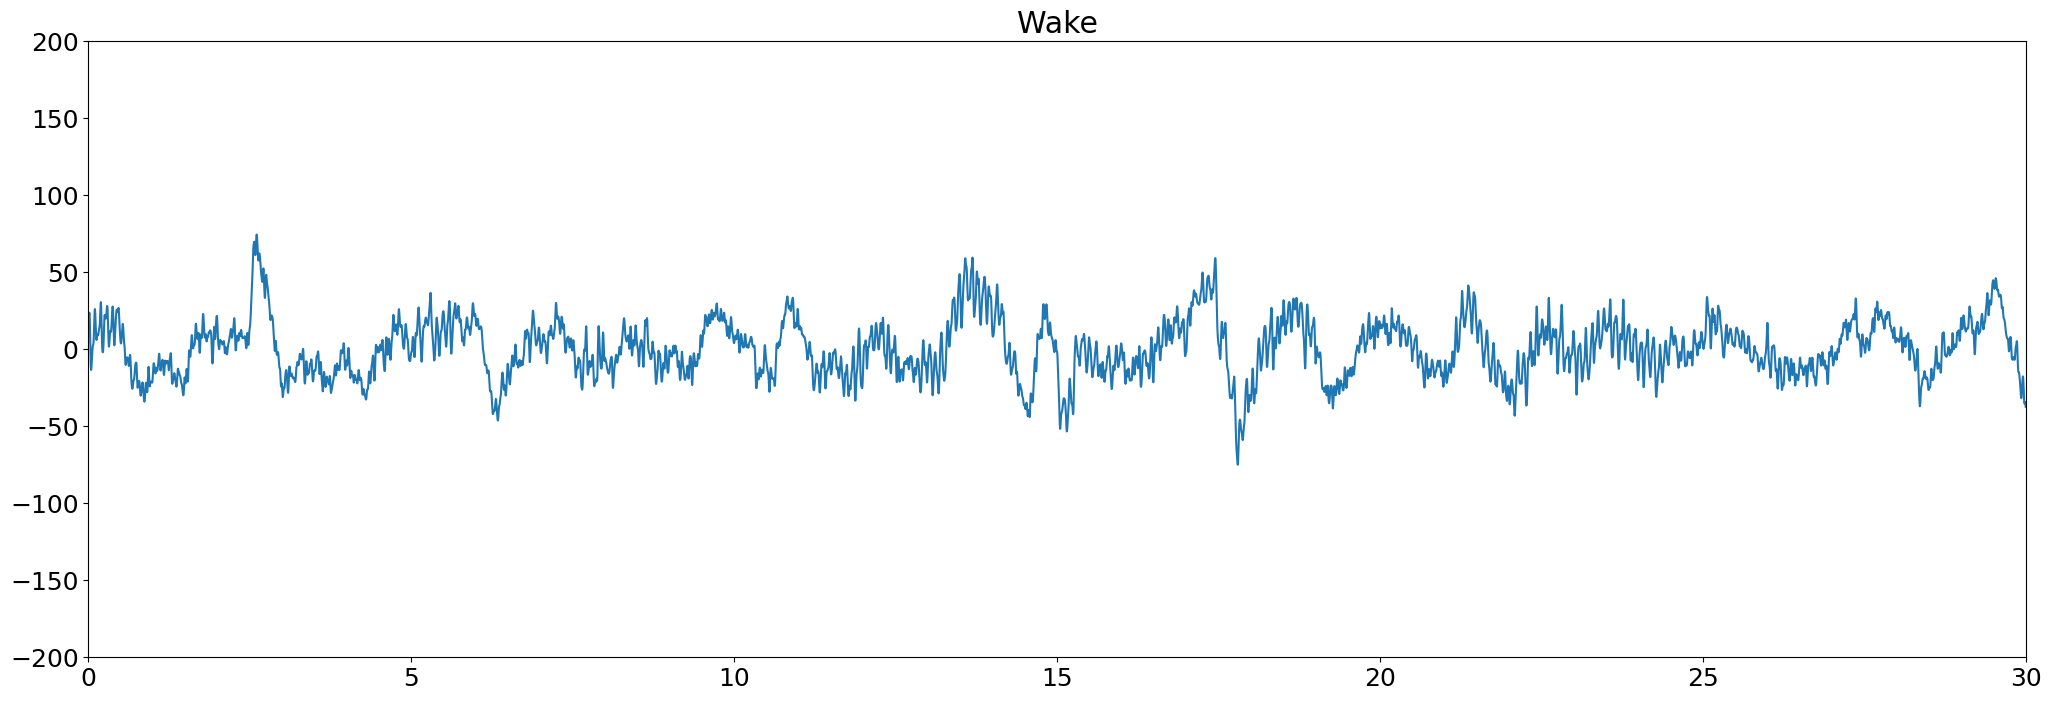

In [ ]:
# let's load the first record
eeg = np.load('/content/dreem_data/sample/sample/f7_O2.npy')
eeg_frontal = np.load('/content/dreem_data/sample/sample/f8_f7.npy')
# plot it !
plot_eeg_epoch([eeg],20,'Wake')

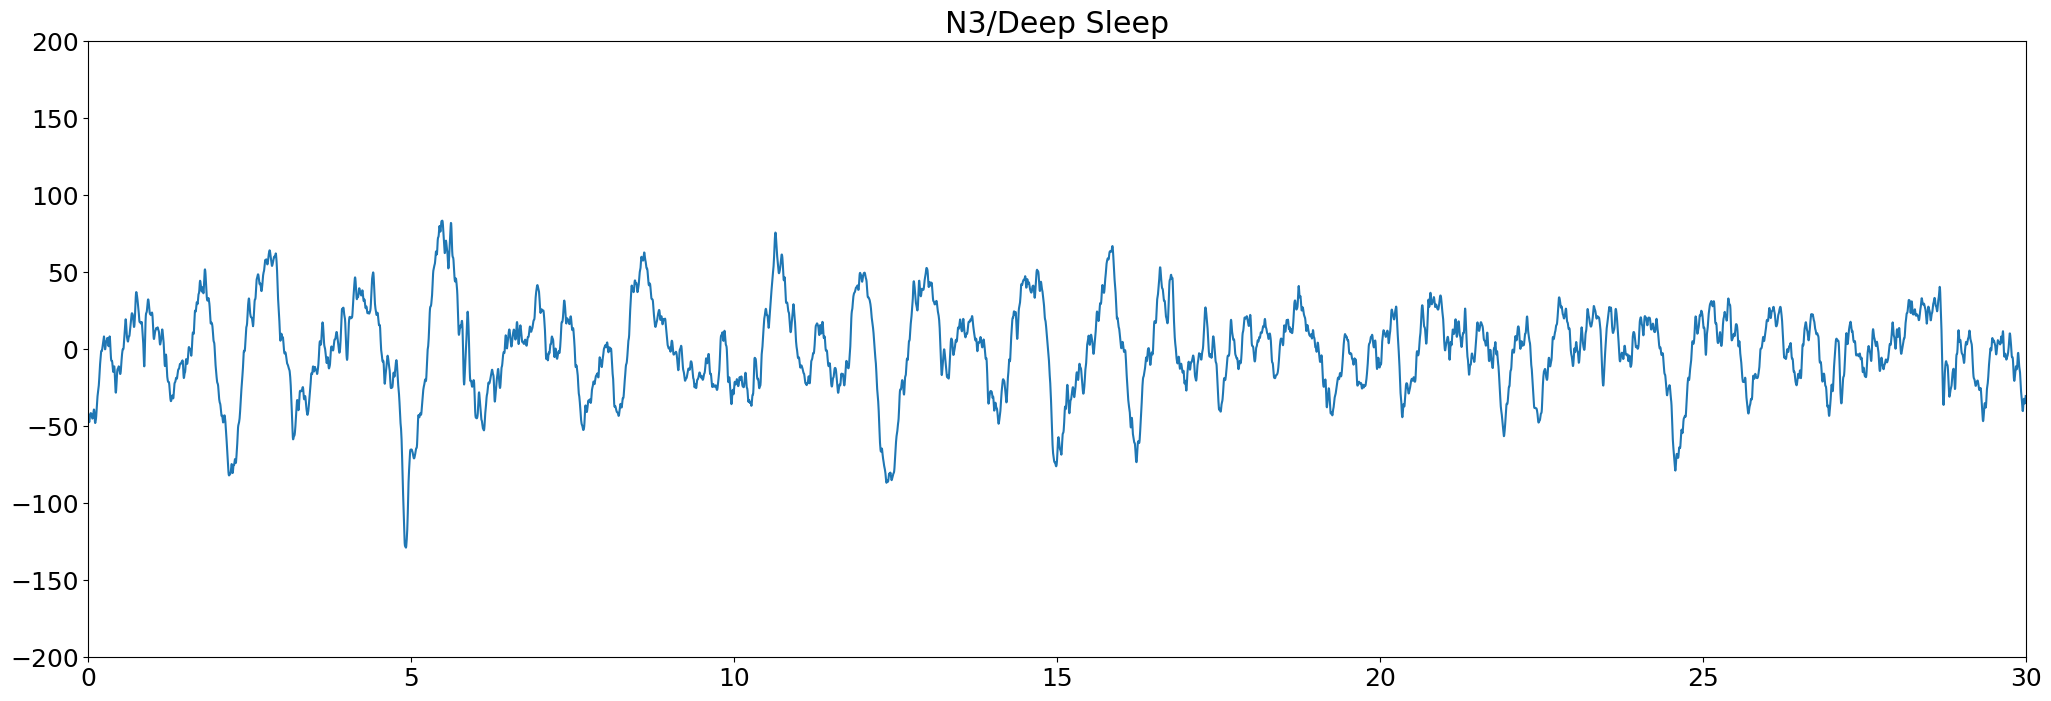

In [ ]:
plot_eeg_epoch([eeg],100,'N3/Deep Sleep')

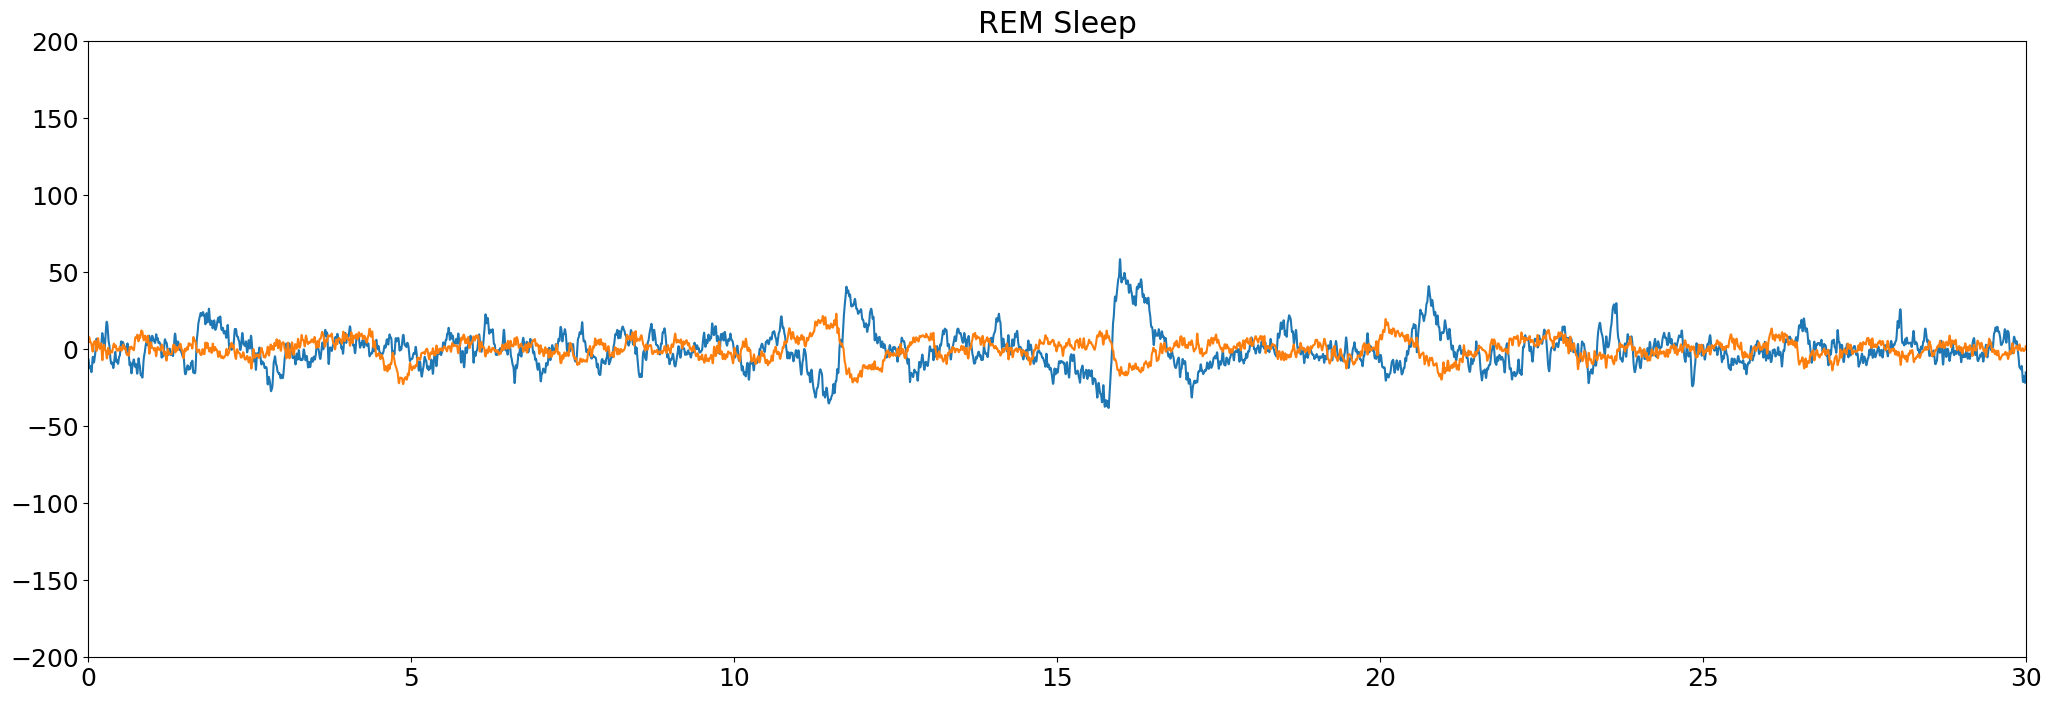

In [ ]:
plot_eeg_epoch([eeg,eeg_frontal],420,'REM Sleep')

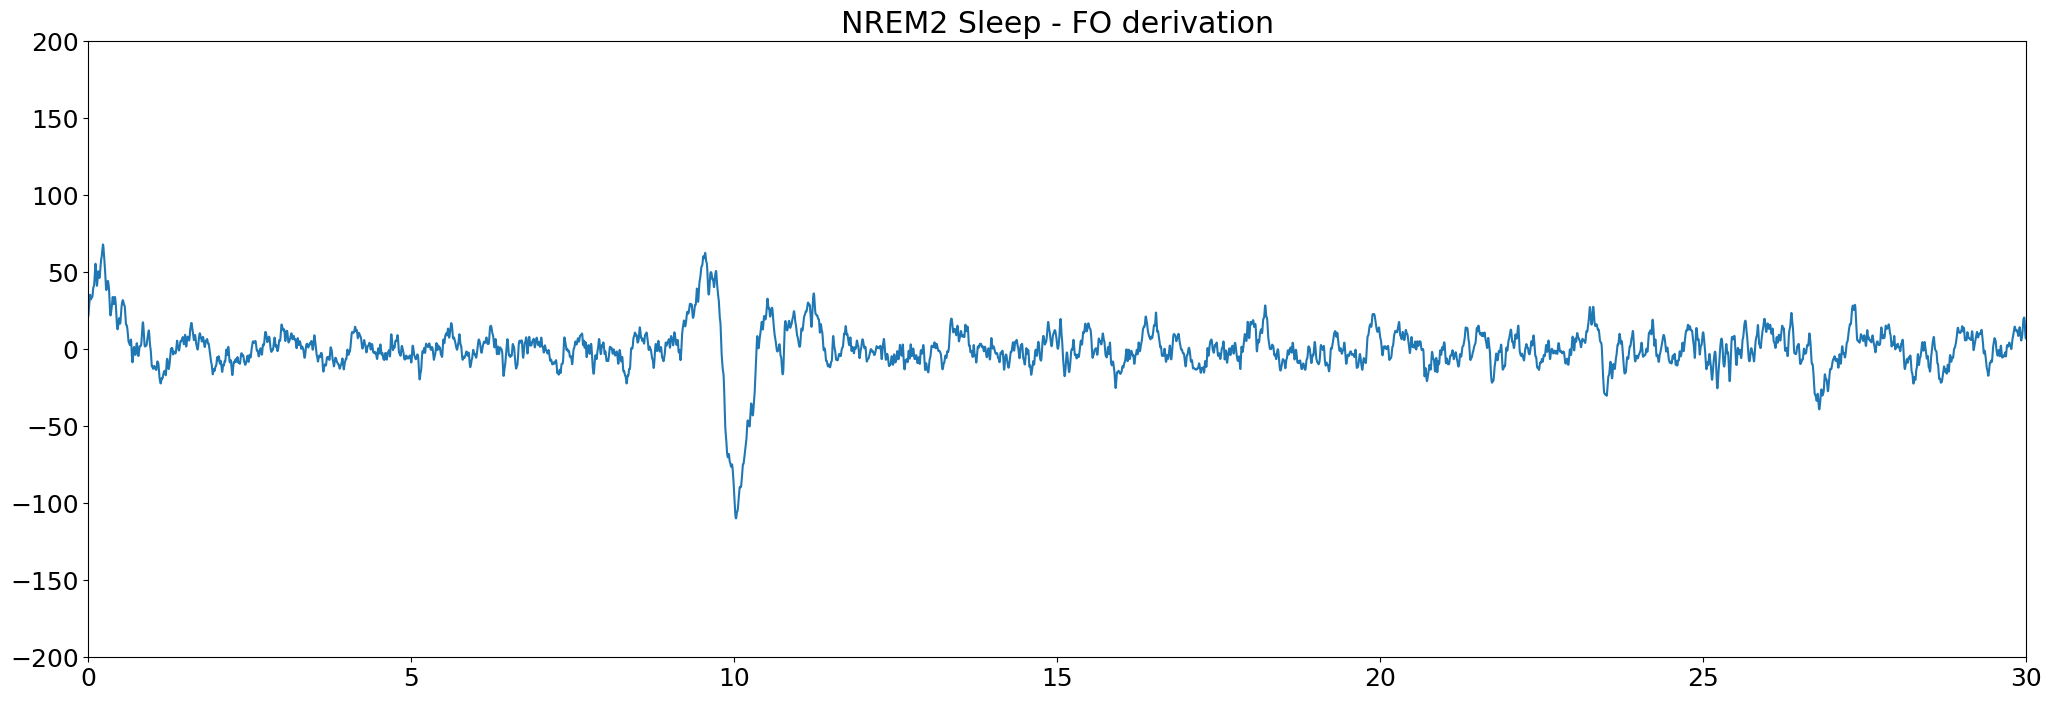

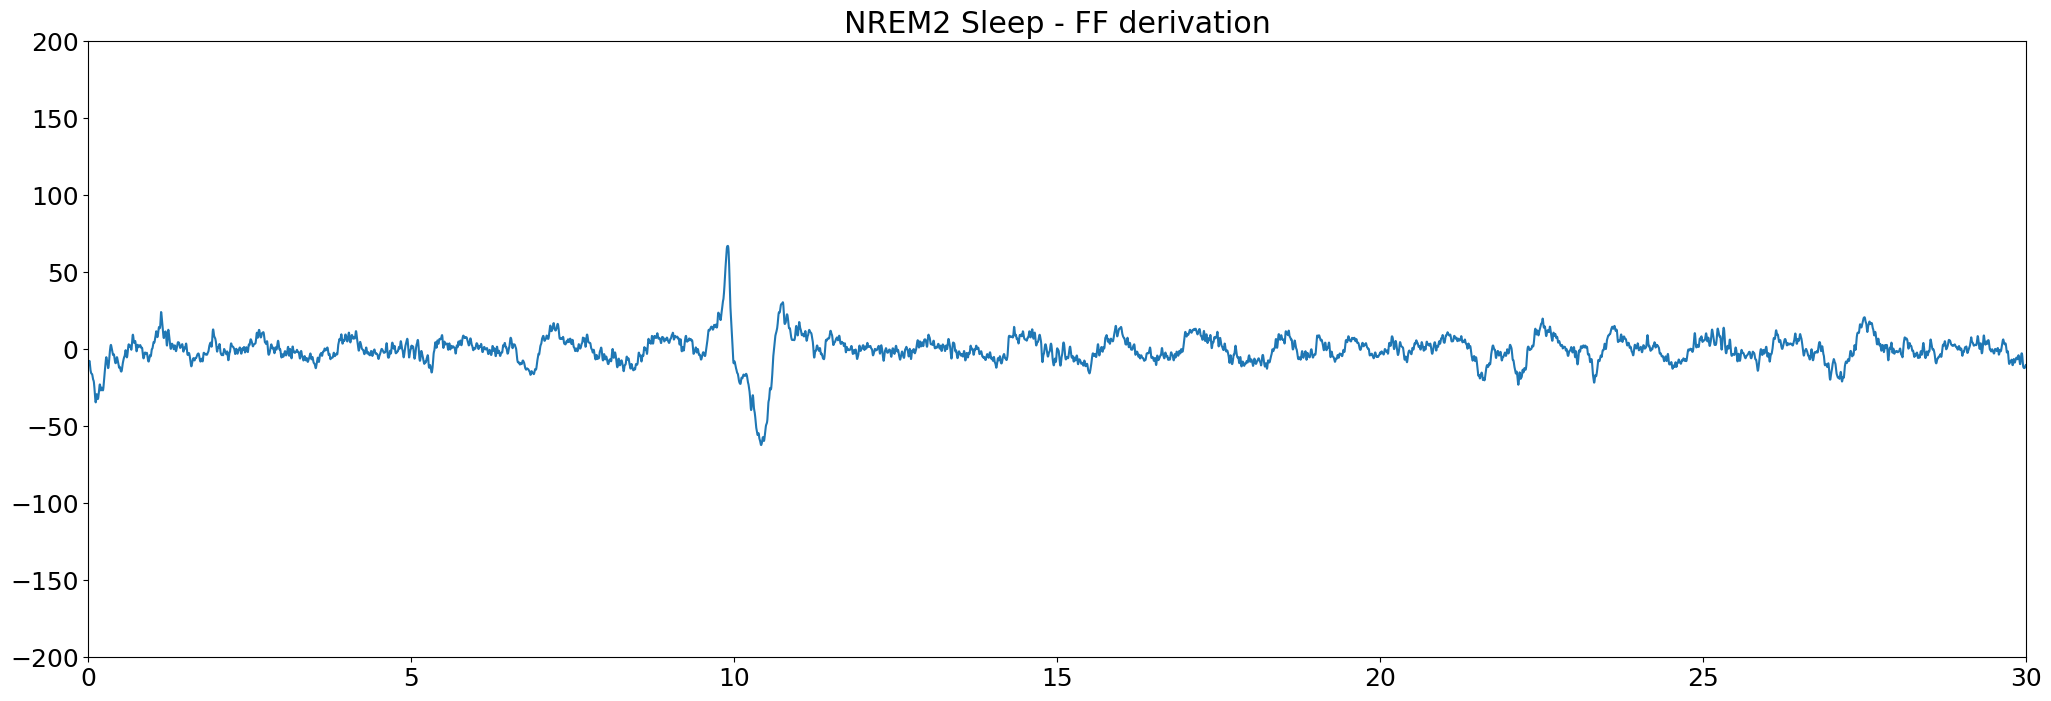

In [ ]:
plot_eeg_epoch([eeg],703,'NREM2 Sleep - FO derivation')
plot_eeg_epoch([eeg_frontal],703,"NREM2 Sleep - FF derivation")

Text(0.5, 0.98, 'Spectrogram on F8-F7')

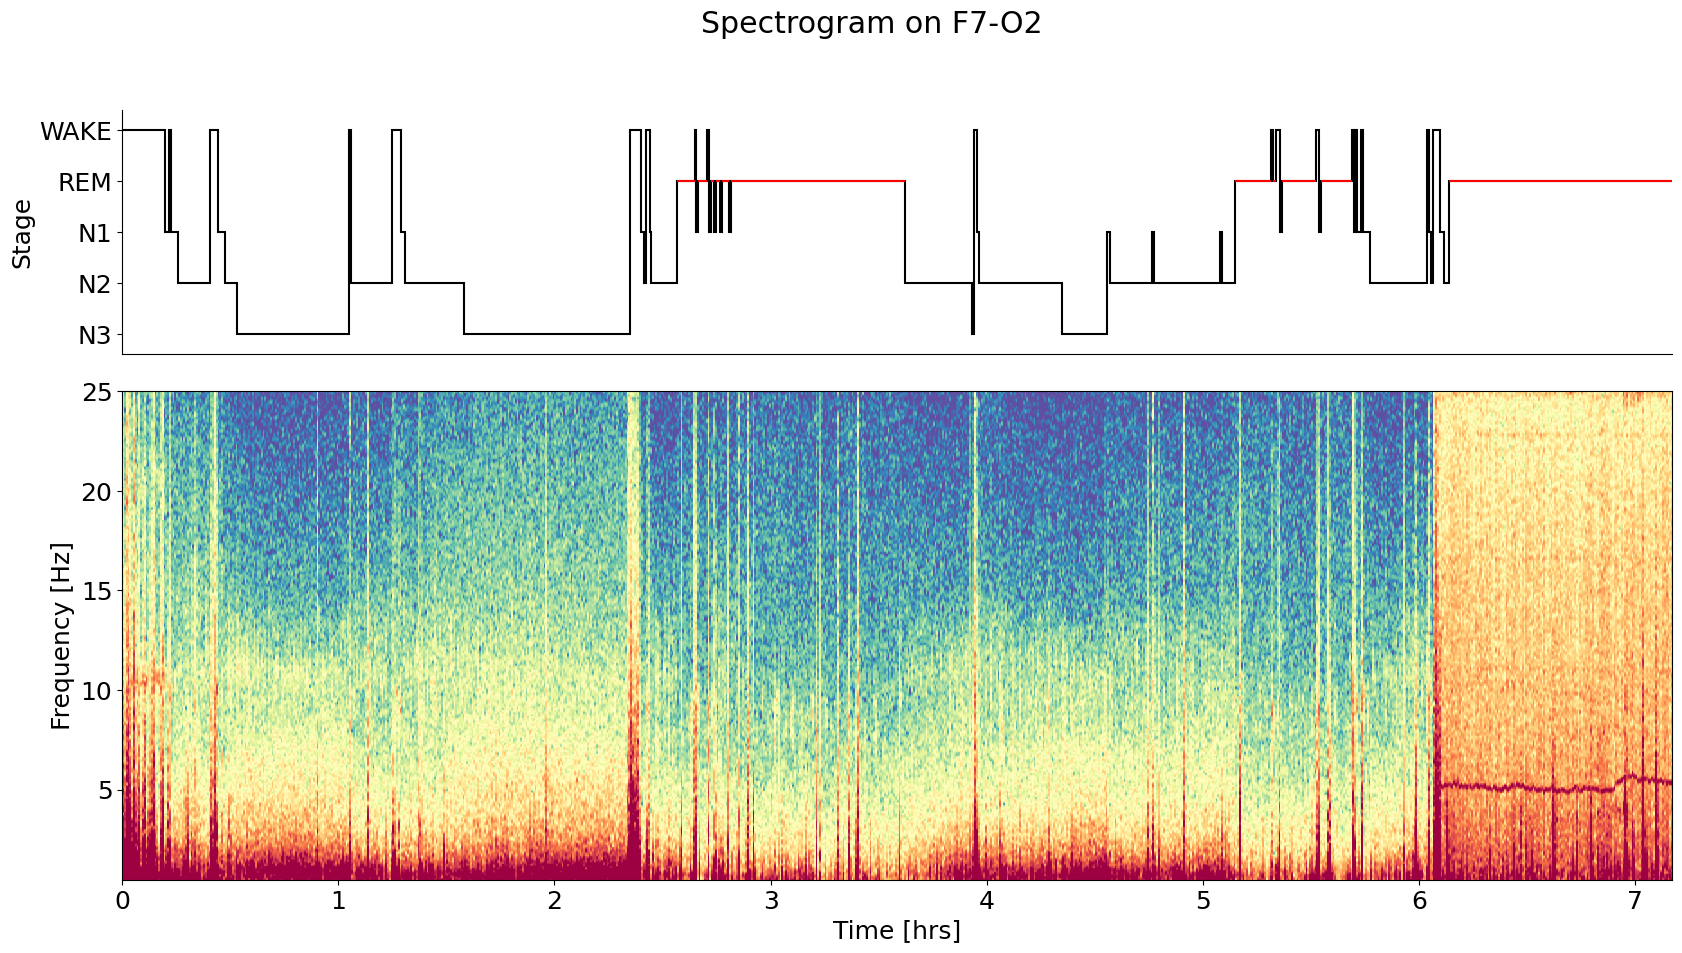

In [ ]:
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = [20,10]
f = yasa.plot_spectrogram(np.clip(eeg[:int(len(eeg) / 250 / 30) * 250 * 30],-200,200), 250,np.repeat(hypnogram,250 * 30), cmap='Spectral_r',trimperc = 2.5)
f.set_figheight(10)
f.set_figwidth(20)
f.suptitle('Spectrogram on F7-O2')

f = yasa.plot_spectrogram(np.clip(eeg_frontal[:int(len(eeg) / 250 / 30) * 250 * 30],-200,200), 250,np.repeat(hypnogram,250 * 30), cmap='Spectral_r',trimperc = 2.5)
f.set_figheight(10)
f.set_figwidth(20)
f.suptitle("Spectrogram on F8-F7")

Text(0.5, 0.98, 'Spectrogram on F8-F7')

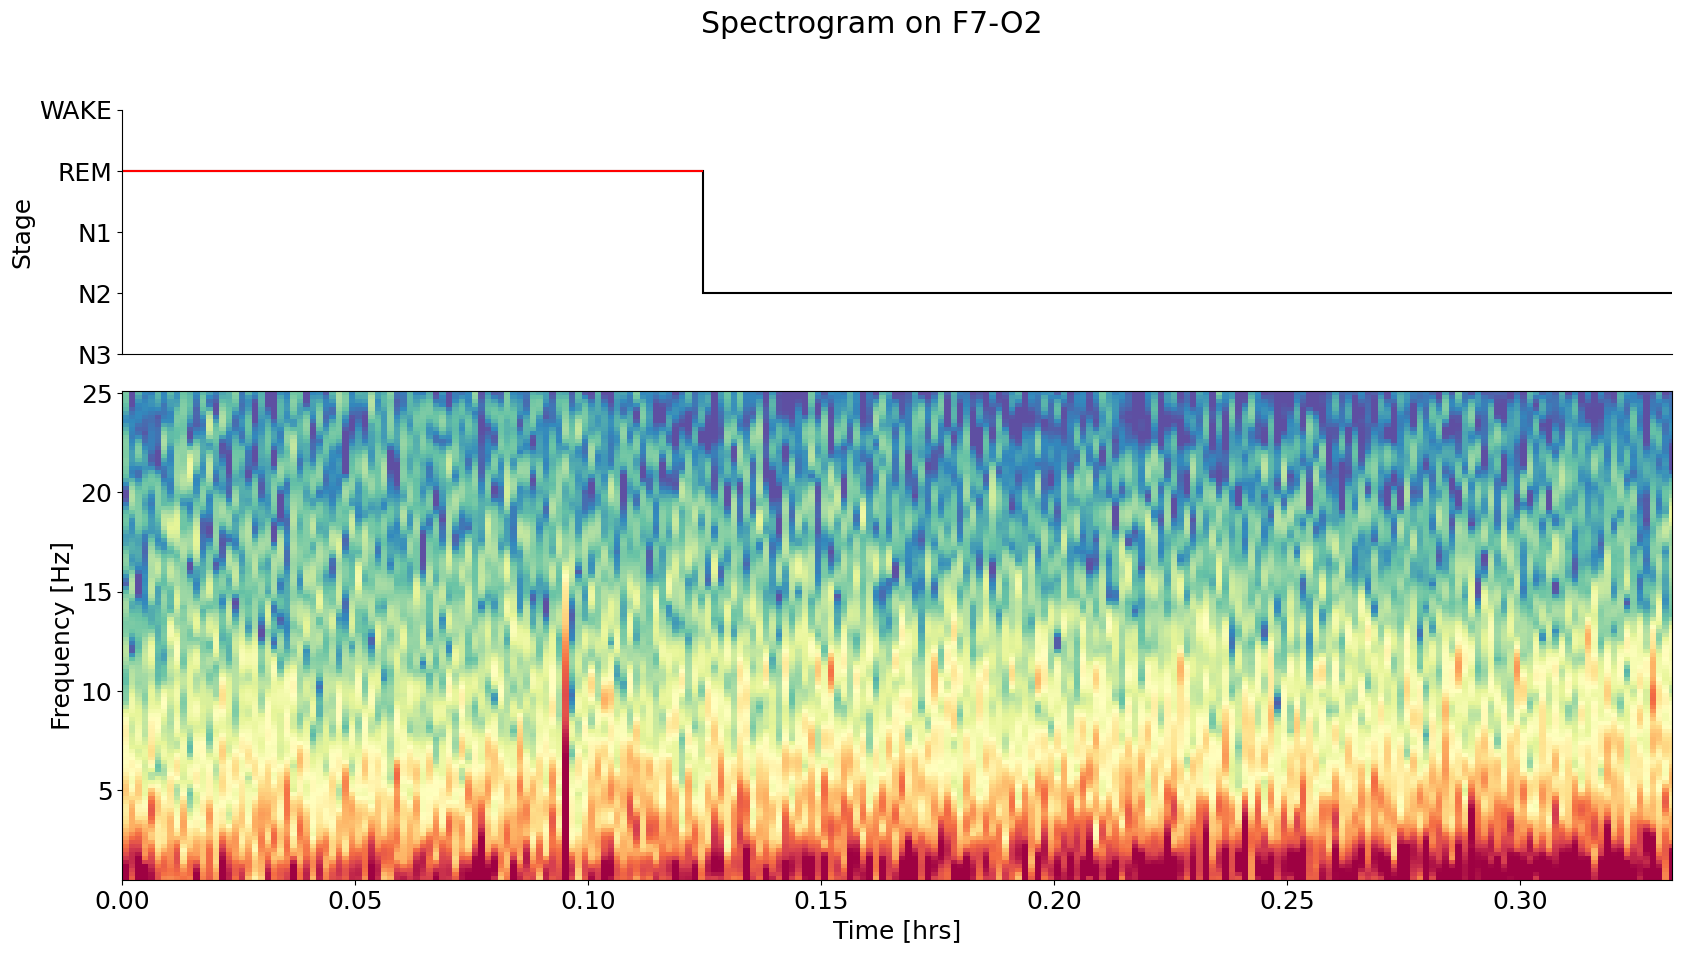

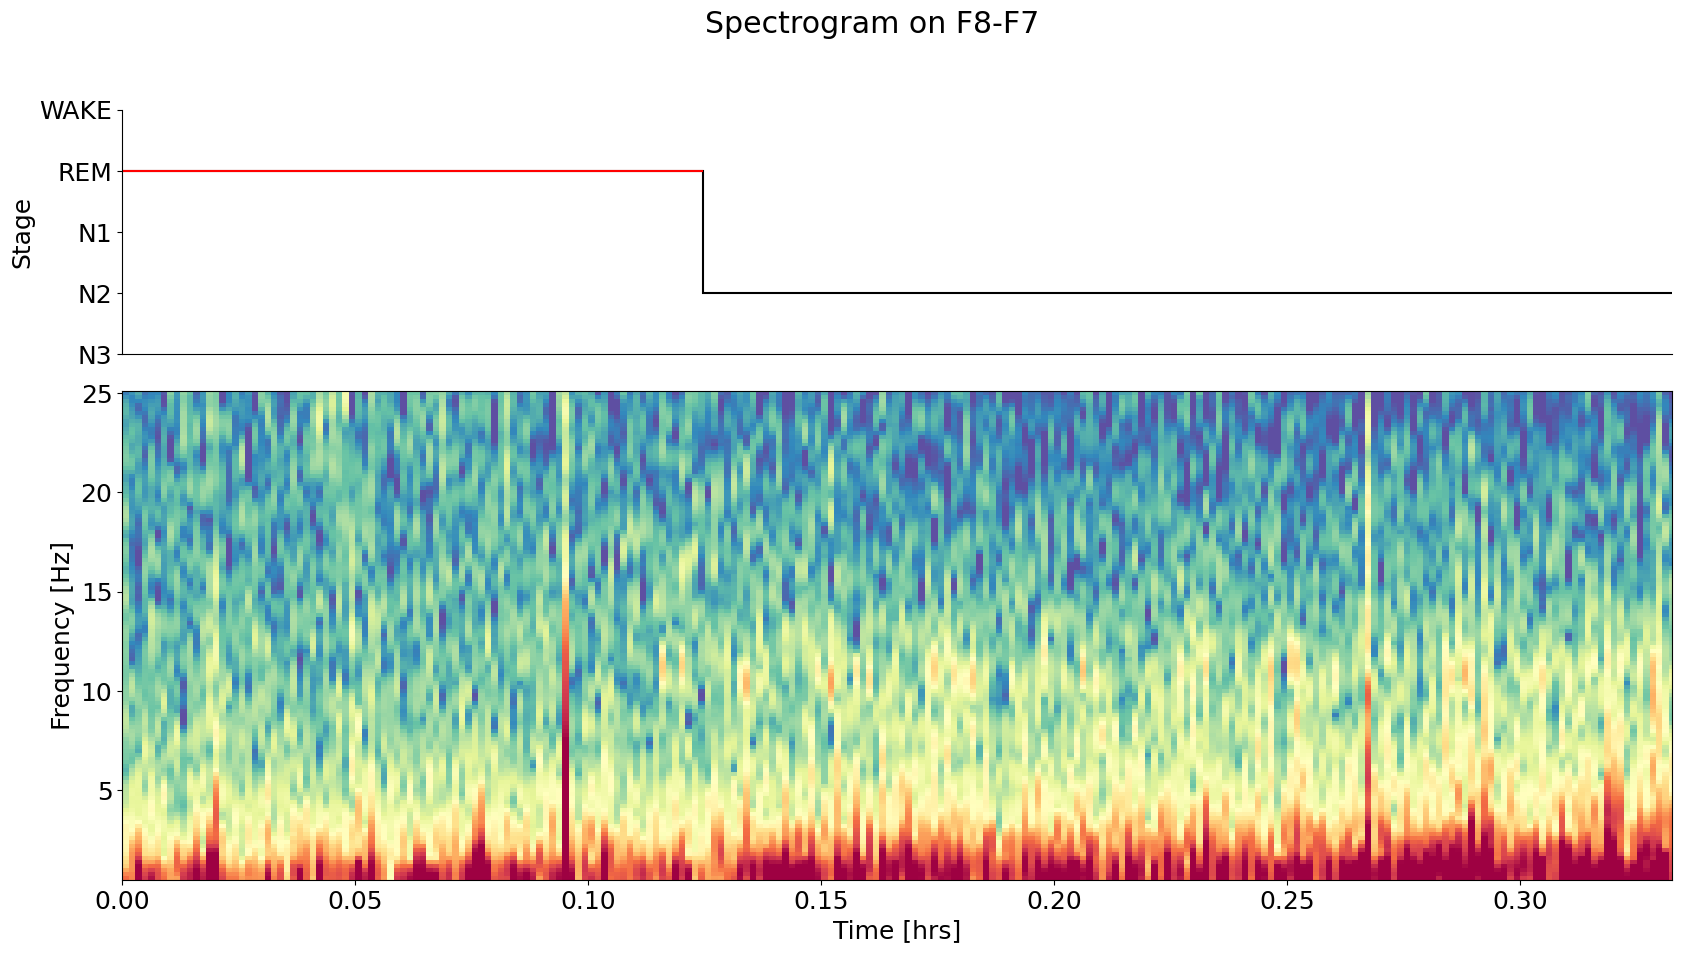

In [ ]:
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = [20,10]
start,end = 420,460
start,end = int(start),int(end)

f = yasa.plot_spectrogram(np.clip(eeg[30 * 250 * start:30 * 250 * end],-200,200),
                          250,
                          np.repeat(hypnogram[start:end],250 * 30),
                          cmap='Spectral_r', win_sec = 5,trimperc = 2)
f.set_figheight(10)
f.set_figwidth(20)
f.suptitle('Spectrogram on F7-O2')


plt.rcParams["figure.figsize"] = [20,10]

f = yasa.plot_spectrogram(np.clip(eeg_frontal[30 * 250 * start:30 * 250 * end],-200,200),
                          250,
                          np.repeat(hypnogram[start:end],250 * 30),
                          cmap='Spectral_r', win_sec = 5,trimperc = 2)
f.set_figheight(10)
f.set_figwidth(20)
f.suptitle("Spectrogram on F8-F7")

Text(0.5, 0.98, 'Spectrogram on F8-F7')

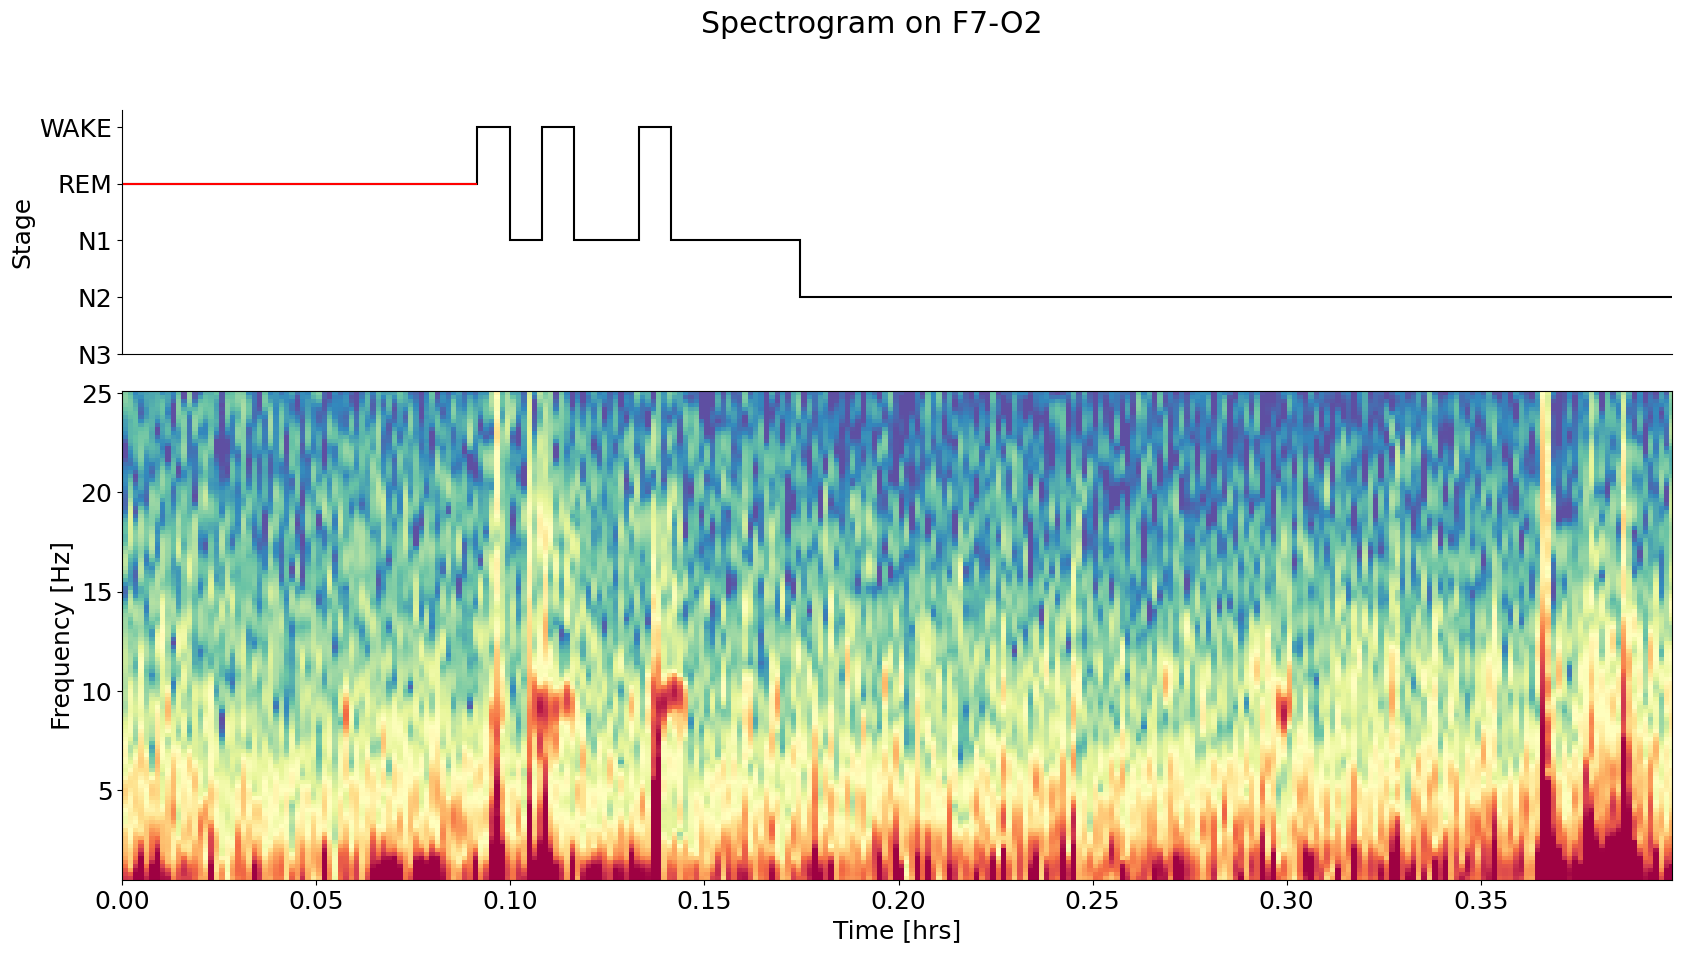

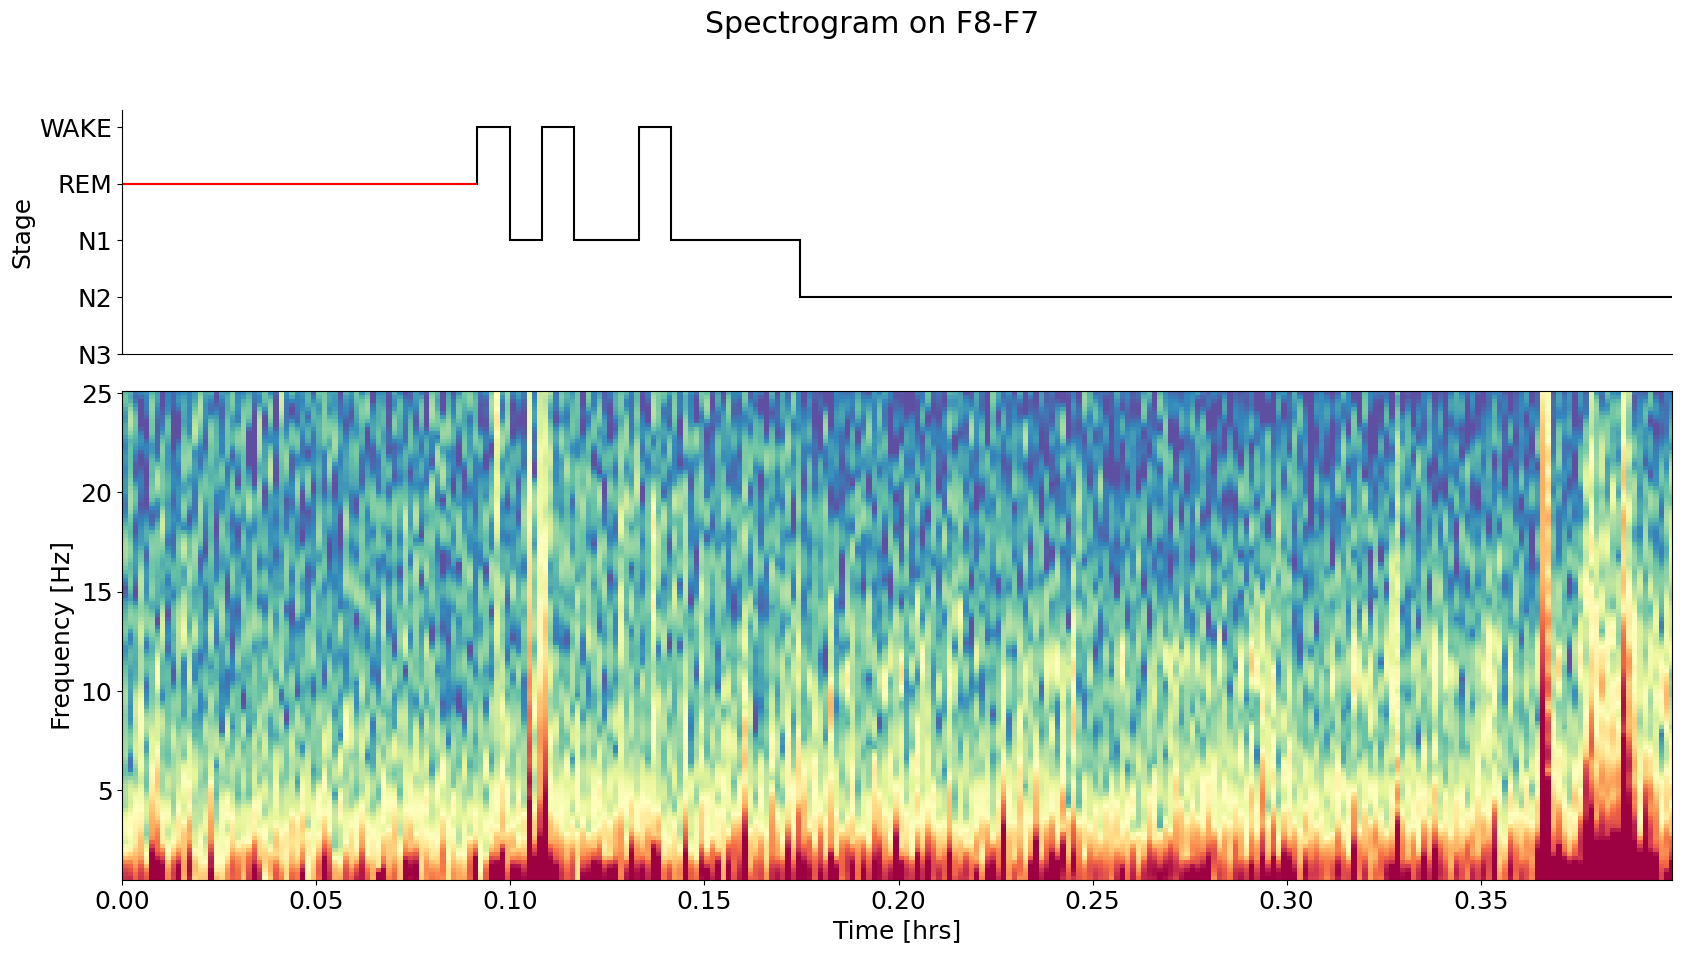

In [ ]:
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = [20,10]
start,end = 120 * 5.6,120 * 6
start,end = int(start),int(end)

f = yasa.plot_spectrogram(np.clip(eeg[30 * 250 * start:30 * 250 * end],-200,200),
                          250,
                          np.repeat(hypnogram[start:end],250 * 30),
                          cmap='Spectral_r', win_sec = 5,trimperc = 2)
f.set_figheight(10)
f.set_figwidth(20)
f.suptitle('Spectrogram on F7-O2')


from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = [20,10]

start,end = int(start),int(end)
f = yasa.plot_spectrogram(np.clip(eeg_frontal[30 * 250 * start:30 * 250 * end],-200,200),
                          250,
                          np.repeat(hypnogram[start:end],250 * 30),
                          cmap='Spectral_r', win_sec = 5,trimperc = 2)
f.set_figheight(10)
f.set_figwidth(20)
f.suptitle("Spectrogram on F8-F7")

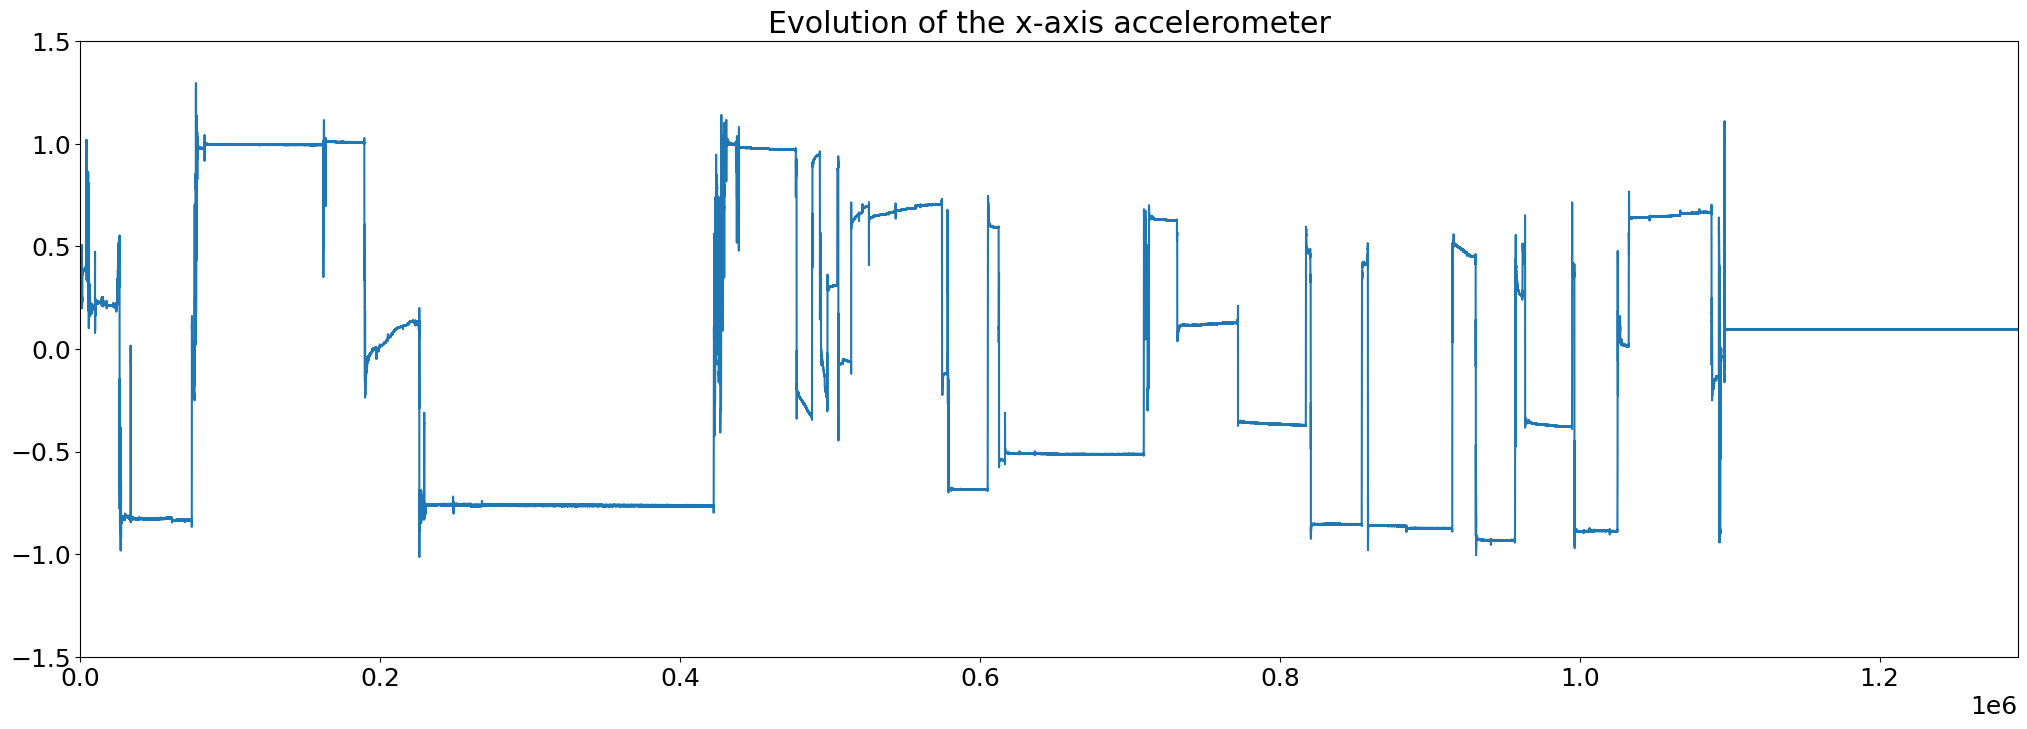

In [ ]:
x = np.load('/content/dreem_data/sample/sample/accelerometer_x.npy')

plt.figure(figsize=(25, 8))
plt.plot(x)
plt.ylim([-1.5, 1.5])
plt.xlim(0,x.shape[0])
plt.title('Evolution of the x-axis accelerometer')
plt.show()

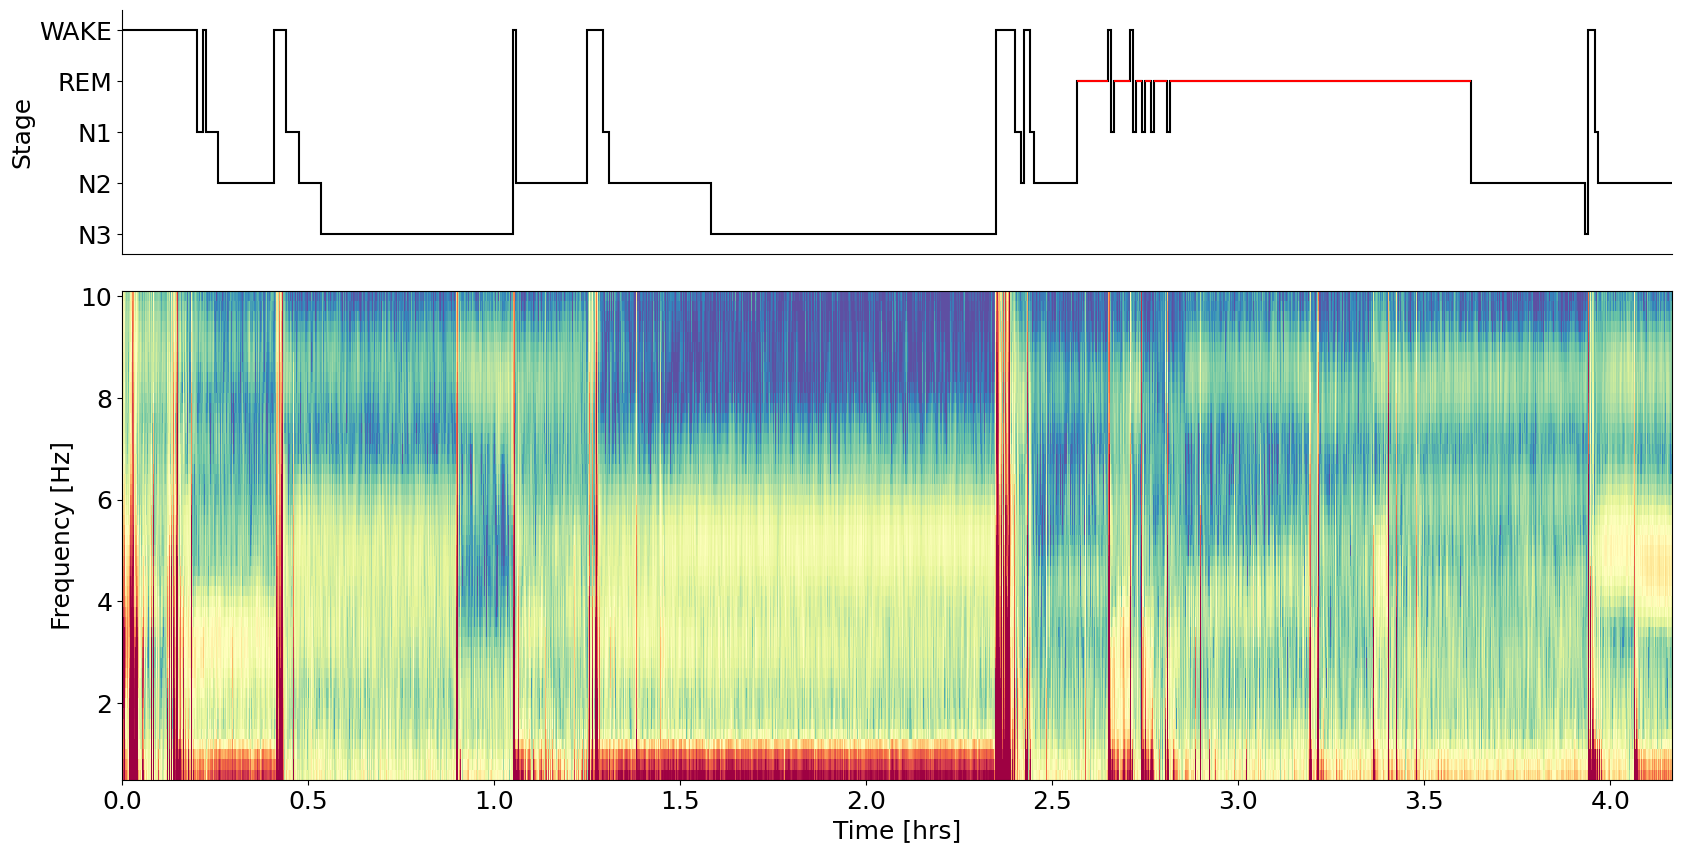

In [ ]:
from scipy.signal import iirfilter, filtfilt
import numpy as np
x = np.load('/content/dreem_data/sample/sample/accelerometer_x.npy')
start,end = 0,500
f = yasa.plot_spectrogram(x[30 * 50 * start:30 * 50 * end],
                          50,
                          np.repeat(hypnogram[start:end],50 * 30),
                          cmap='Spectral_r', win_sec = 5,trimperc = 2,fmax = 10)
f.set_figheight(10)
f.set_figwidth(20)

In [ ]:
from scipy.signal import welch
from lspopt import spectrogram_lspopt


def get_average_spectrum_for_epochs(eeg,epochs):
    """
    Return the average power in each of the fourier bin for several epochs.
    """
    EEG_FS = 250
    psds = []
    for epoch in epochs:
        idx_start,idx_end = 250 * 30 * epoch,250 * 30 * (epoch + 1)
        freqs,t,psd = spectrogram_lspopt(np.clip(eeg[idx_start:idx_end],-150,150),250,nperseg = 1000)
        psds += [np.mean(psd ** 2,1)]
    return freqs,np.array(psds).mean(0)


def plot_average_spectrum_for_epochs(eeg,epochs):
    """
    Compute and plot the power spectrum of a list of epochs
    """
    freqs,psd = get_average_spectrum_for_epochs(eeg,epochs)
    psd = psd/np.sum(psd)
    plt.plot(freqs, psd)
    plt.xlim(0, 18)
    plt.yscale('log')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Relative power')


def plot_average_spectrum_for_sleep_stage(eeg,hypnogram, sleep_stage):
    """
    Plot the average spectrum for all the sleep epochs of the provided sleep stage.
    """
    index = np.where(hypnogram == sleep_stage)[0]
    plot_average_spectrogram_for_epochs(eeg,index)

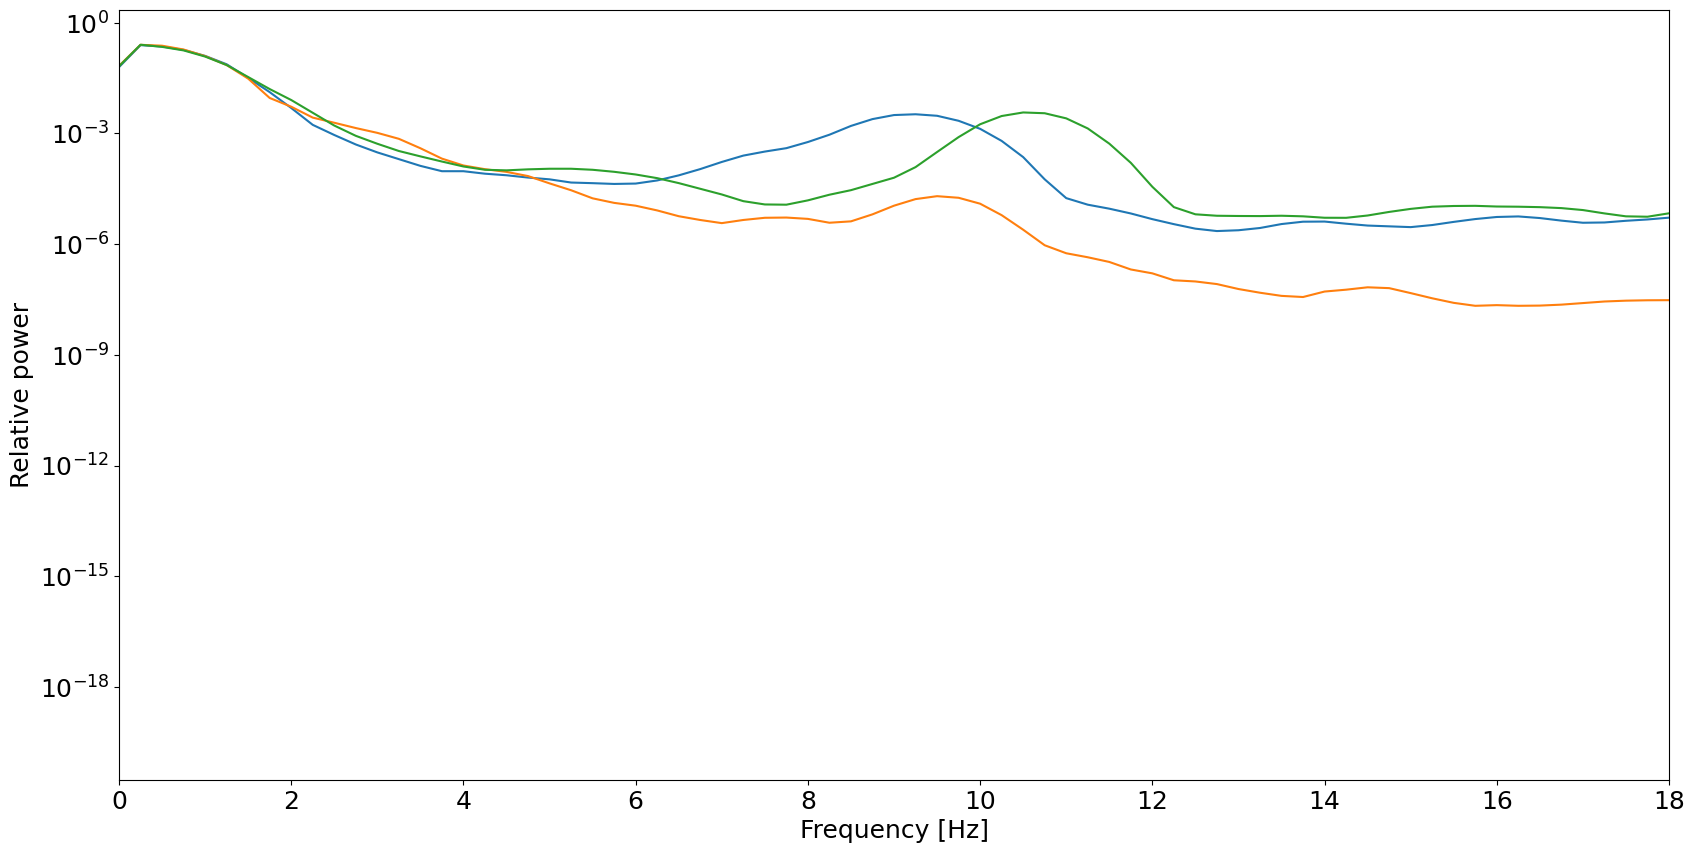

In [ ]:
plot_average_spectrum_for_epochs(eeg,[685])
plot_average_spectrum_for_epochs(eeg,[688])
plot_average_spectrum_for_epochs(eeg,[20])

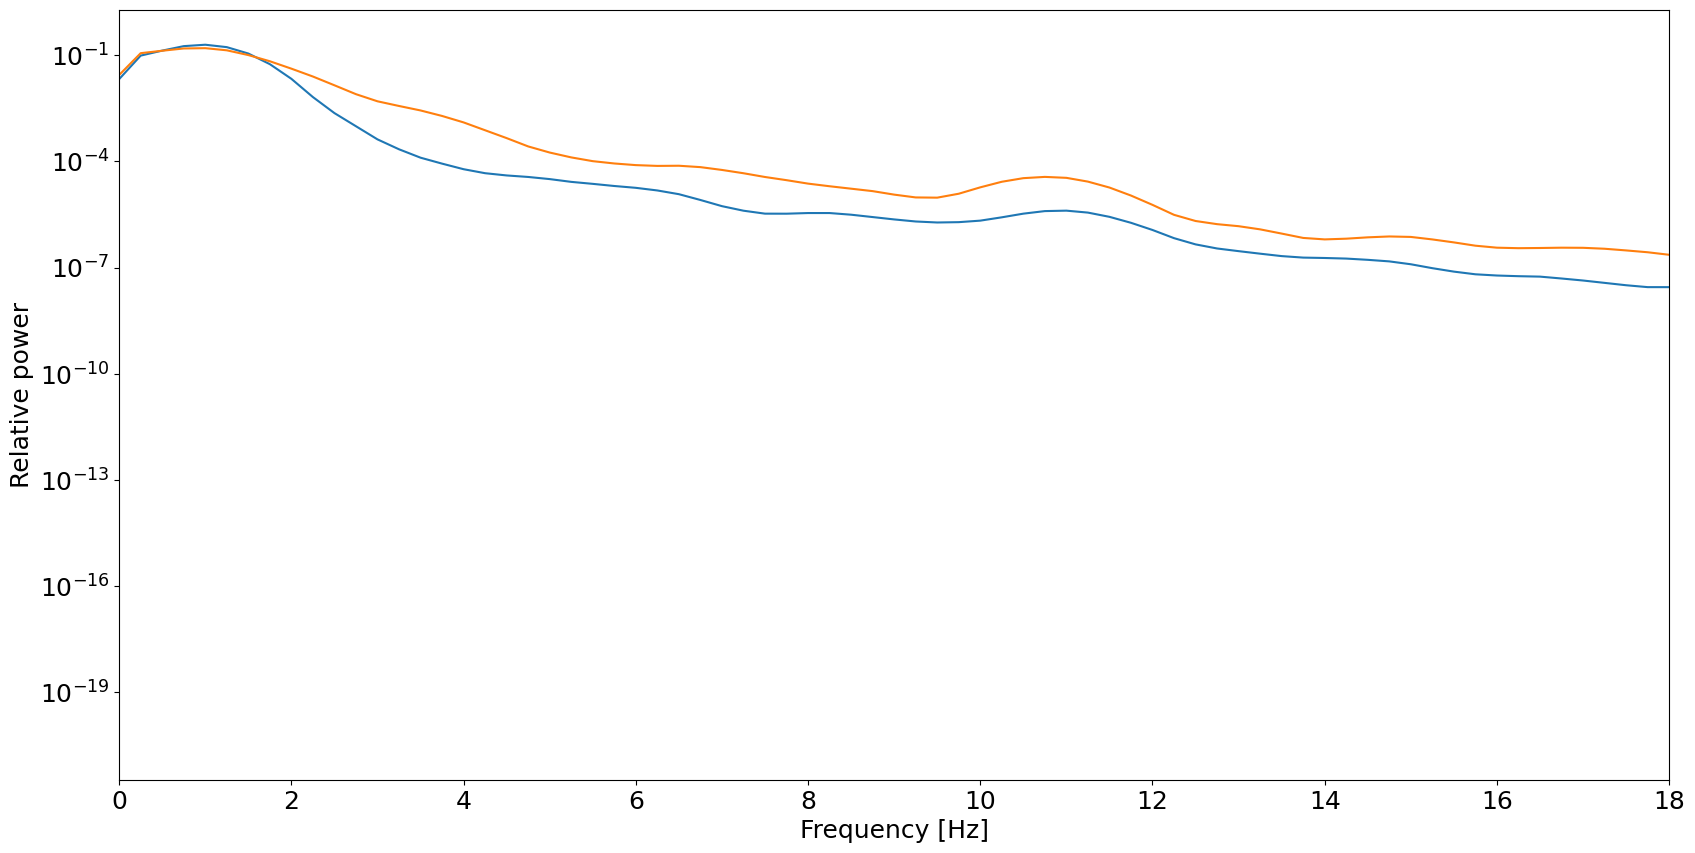

In [ ]:
plot_average_spectrum_for_epochs(eeg,[93])
plot_average_spectrum_for_epochs(eeg_frontal,[93])

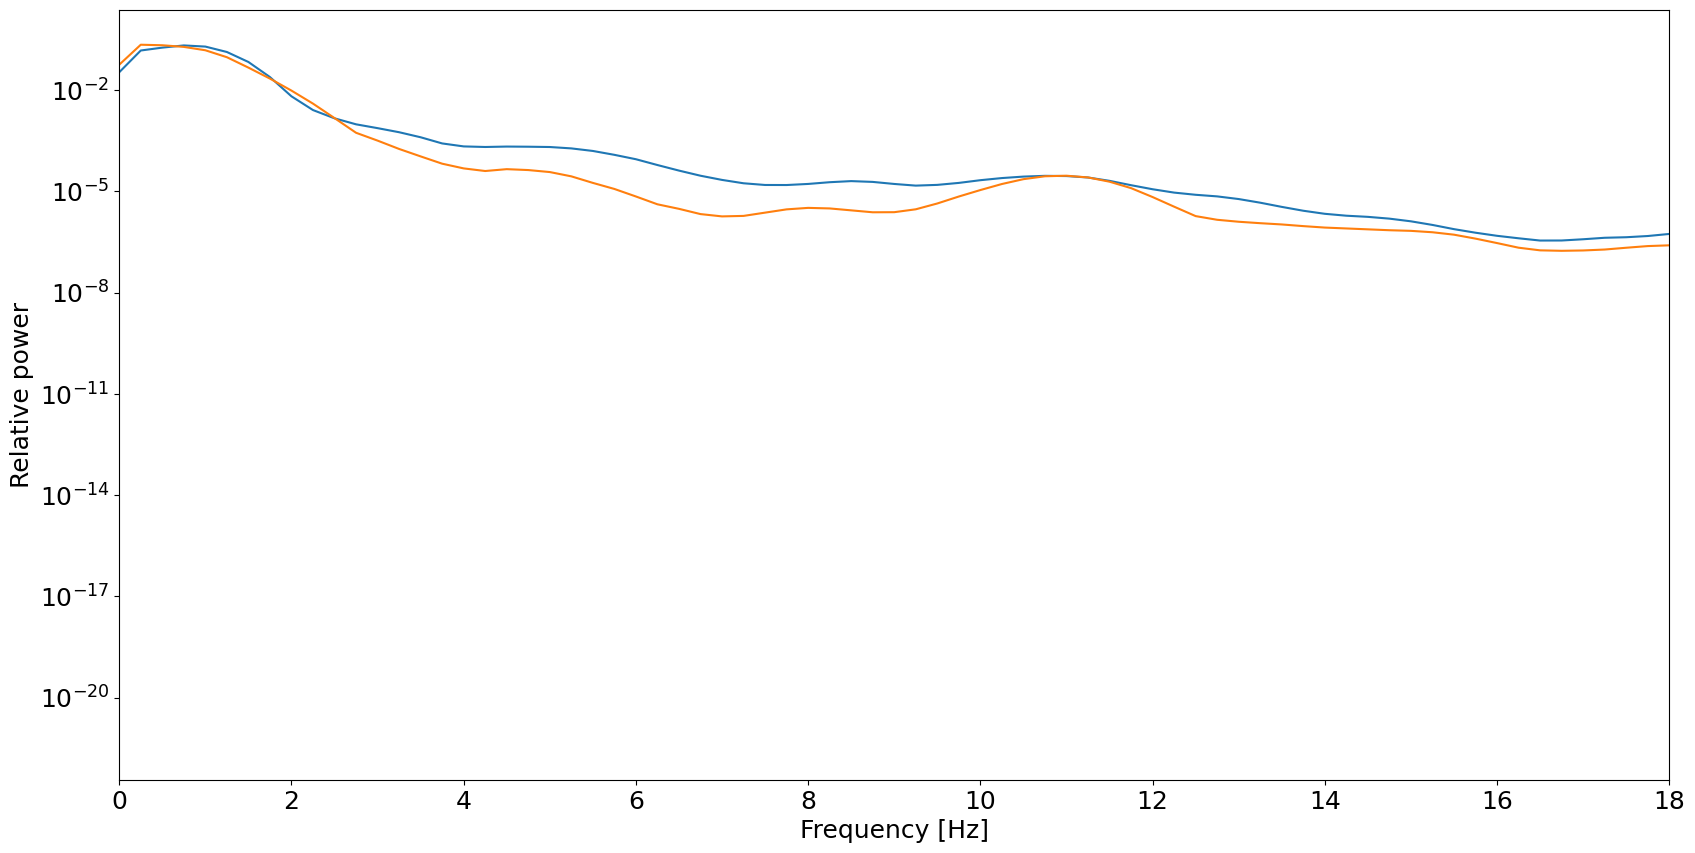

In [ ]:
plot_average_spectrum_for_epochs(eeg,[700])
plot_average_spectrum_for_epochs(eeg_frontal,[700])

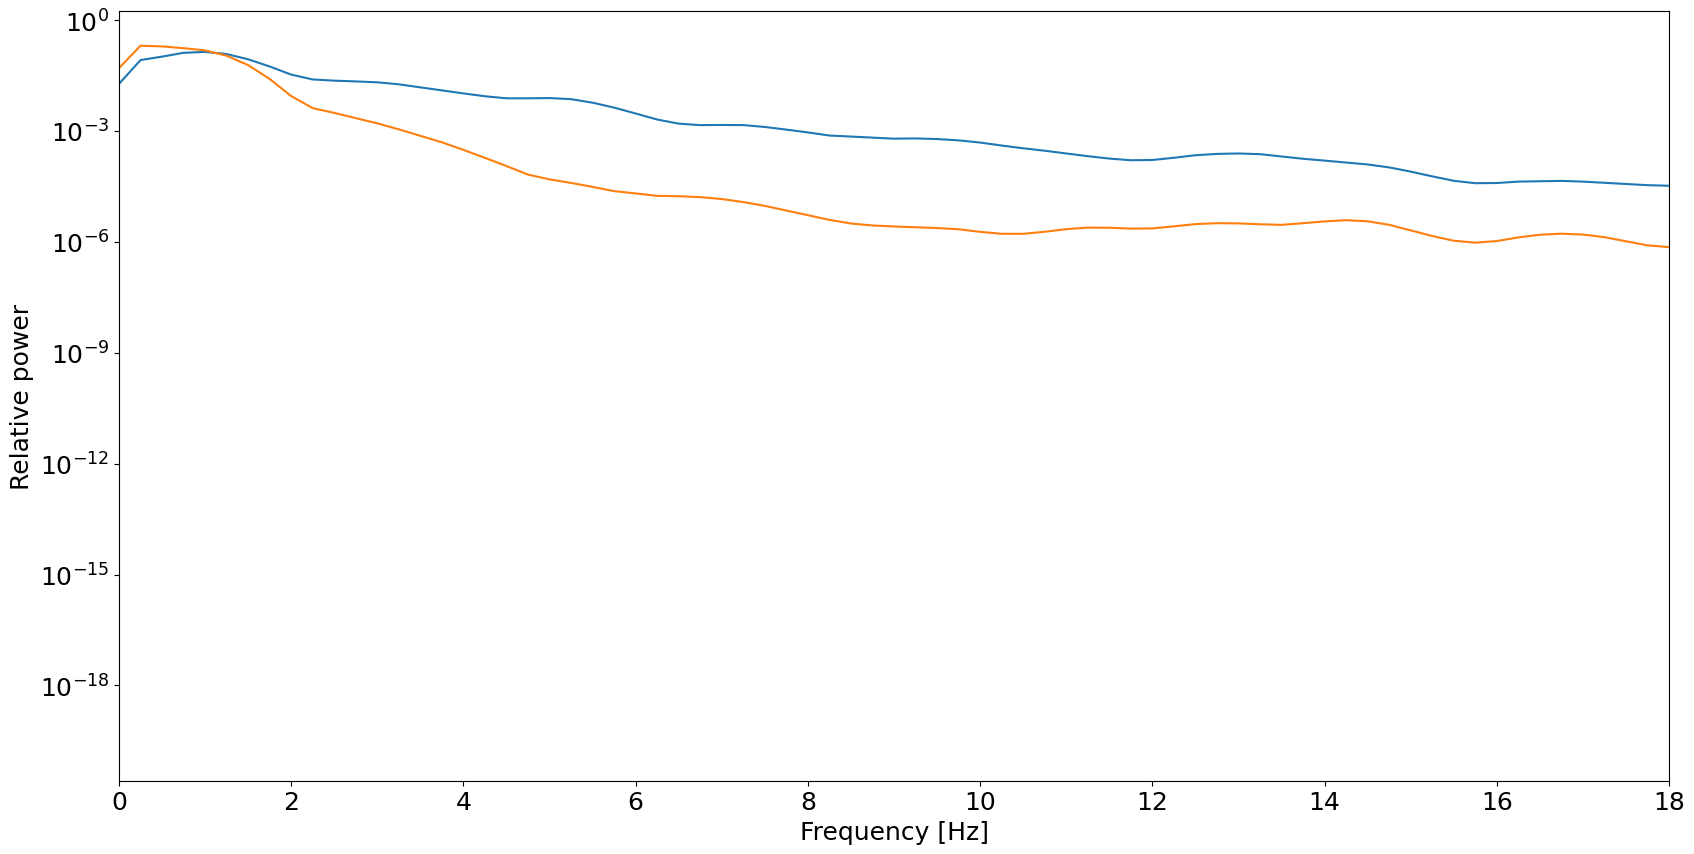

In [ ]:
plot_average_spectrum_for_epochs(eeg,[405])
plot_average_spectrum_for_epochs(eeg_frontal,[405])

In [ ]:
# put your rules in this function
def find_stage_from_spectrum(spectrum, freq):
    # by default the value is -1
    stage = -1

    # write the rules for each substage
    if 1:
        stage = 0
    elif 1:
        stage = 1
    elif 1:
        stage = 2
    elif 1:
        stage = 3
    else:
        stage = 4

    return stage

In [ ]:
predictions = []
for epoch in range(0,len(hypnogram)):
    freq,spectrum = get_average_spectrum_for_epochs(eeg,[epoch])
    prediction = find_stage_from_spectrum(spectrum,freq)
    predictions.append(prediction)

true_labels = hypnogram

# Get your scores
scores = {}
scores['balanced_accuracy'] = balanced_accuracy_score(true_labels, predictions)
scores['cohen_kappa'] = cohen_kappa_score(true_labels, predictions)
scores['confusion_matrix'] = confusion_matrix(true_labels, predictions)

print(scores)

{'balanced_accuracy': np.float64(0.2), 'cohen_kappa': np.float64(0.0), 'confusion_matrix': array([[ 60,   0,   0,   0,   0],
       [ 37,   0,   0,   0,   0],
       [282,   0,   0,   0,   0],
       [180,   0,   0,   0,   0],
       [302,   0,   0,   0,   0]])}
